1- Download the MNIST dataset using the torchvision library and create a subset of the dataset containing 1,000 samples. 
Each sample will include a 28 × 28 pixel image, along with a single integer value denoting the sample’s respective class (number).

In [1]:
import torch
from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = datasets.MNIST(root="data", train=True, download=True, transform=transform)

In [3]:
subset_indices = torch.randperm(len(mnist_dataset))[:1000]
subset_mnist = torch.utils.data.Subset(mnist_dataset, subset_indices)

2- Plot a histogram of classes in your subset of MNIST.

In [4]:
import matplotlib.pyplot as plt

In [5]:
labels = [sample[1] for sample in subset_mnist]

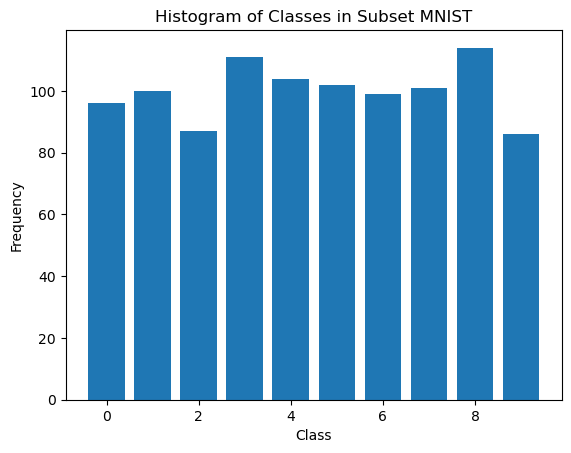

In [6]:
plt.hist(labels, bins=range(11), align='left', rwidth=0.8)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Histogram of Classes in Subset MNIST")
plt.show()

3- Use the einops python package to ‘batch’ the subset of MNIST images. Each batch should contain 25 different samples.

In [7]:
import einops

In [8]:
images = [sample[0] for sample in subset_mnist]

In [9]:
batched_images = einops.rearrange(images, '(b batch_size) c h w -> batch_size c b h w', batch_size=25, c=1)

4- Randomly select an MNIST image sample and, using matplotlib, plot it in three dimensions. 
The x and y-axis’ should be the respective pixel locations, and the z-axis should be the pixel intensity.

In [10]:
import numpy as np

In [11]:
def plot_3d_image(image):
    x, y = np.meshgrid(np.arange(28), np.arange(28))
    z = image.cpu().detach().numpy().squeeze()
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")

    ax.scatter(x.flatten(), y.flatten(), z, c=z, cmap="viridis")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("Pixel Intensity")
    plt.show()

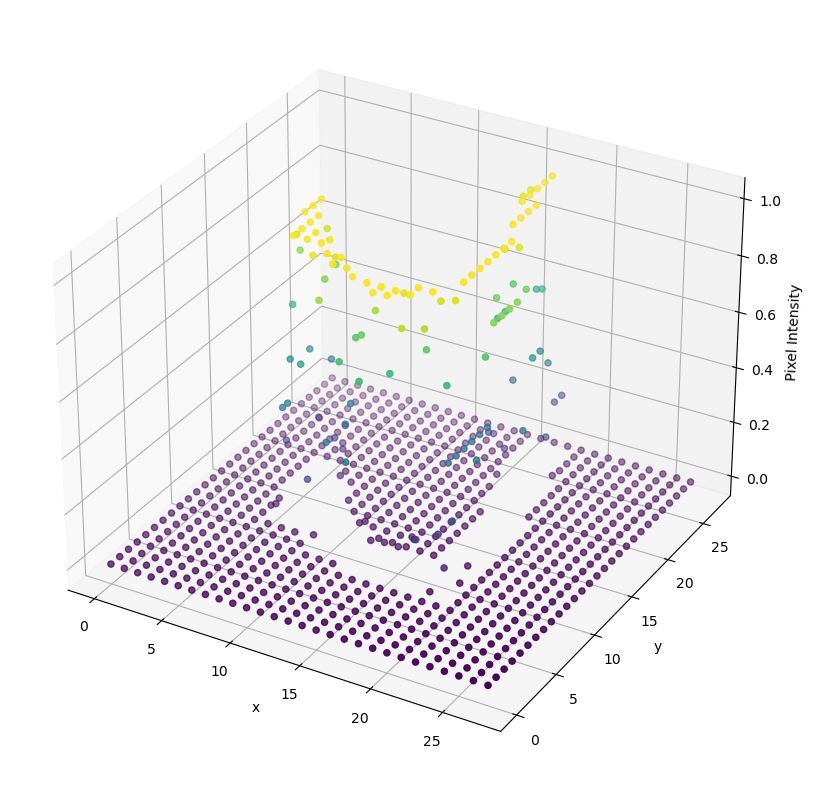

In [12]:
image_index = np.random.randint(0, len(subset_mnist))
image = subset_mnist[image_index][0]
plot_3d_image(image)

In [13]:
!pwd

/home/exouser/ME592_Spring2024/01_Intro
